Điểm đại học năm nay được biết là có vấn đề trong chấm điểm. Sau nay là một số thống kê từ điểm từ các 62/63 tỉnh thành trong cả nước. Mặc dù vẫn còn thiếu data từ tỉnh An Giang, nhưng số lượng đủ lớn, hy vọng phần nào hiểu thêm thực trang thi cử, và phát hiện ra các vấn đề trong kì thi năm này. Data mình lấy từ [Anh Duong Khao Nguyen](https://github.com/dnanhkhoa/nhse-dataset). Notebook này sẽ nghiên cứu các vấn đề sau.

 [1. Thống kê điểm thi cả nước](#1)

 [2. So sánh điểm thi tỉnh Hà Giang với điểm thi cả nước](#2) 
 ## 1. Thống kê điểm thi cả nước
 Đầu tiên chúng ta nhập thư viện và dữ liệu thu thập được từ 62 tỉnh thành 

In [3]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path='/Pooh/diem thi ca nuoc/nhse-dataset-master/csv/'
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)


In [5]:
len(allFiles)

62

In [21]:
frame.head(10)

,SBD,TOÁN,VĂN,LÝ,HÓA,SINH,SỬ,ĐỊA,GDCD,ANH,KHTN,KHXH,KHỐI A,KHỐI B,KHỐI C,KHỐI D,KHỐI A1
0,7000225,6.4,6.00,5.00,3.75,4.75,NaN,NaN,NaN,3.2,4.50,NaN,15.15,14.90,NaN,15.6,14.60
1,7000234,3.8,3.75,NaN,NaN,NaN,3.25,4.50,5.75,4.6,NaN,4.50,NaN,NaN,11.50,12.15,NaN
2,7000246,6.8,5.00,5.25,5.25,3.25,NaN,NaN,NaN,4.8,4.58,NaN,17.30,15.30,NaN,16.6,16.85
3,7000251,6.8,4.75,6.00,5.25,5.25,NaN,NaN,NaN,3.4,5.50,NaN,18.05,17.30,NaN,14.95,16.20
4,7000270,3.6,3.50,NaN,NaN,NaN,4.50,6.25,7.50,4.4,NaN,6.08,NaN,NaN,14.25,11.5,NaN
5,7000276,2.2,5.25,NaN,NaN,NaN,3.50,4.75,7.50,3.2,NaN,5.25,NaN,NaN,13.50,10.65,NaN
6,7000289,5.8,3.25,4.25,5.25,4.00,NaN,NaN,NaN,3.8,4.50,NaN,15.30,15.05,NaN,12.85,13.85
7,7000297,6.0,7.25,NaN,NaN,NaN,5.75,6.75,8.25,3.0,NaN,6.92,NaN,NaN,19.75,16.25,NaN
8,7000310,5.2,7.50,NaN,NaN,NaN,4.25,6.75,8.75,3.4,NaN,6.58,NaN,NaN,18.50,16.1,NaN
9,7000529,4.0,6.50,NaN,NaN,NaN,3.75,5.25,7.25,5.2,NaN,5.42,NaN,NaN,15.50,15.7,NaN


In [22]:
print("Ngoài tỉnh An Giang, cả nước có", frame.shape[0], 'thí sinh')

Ngoài tỉnh An Giang, cả nước có 827763 thí sinh


Các kí hiệu NaN là các môn các thí sinh không thi. Mỗi học sinh thi 6 môn trong kì thi tốt nghiệp này. 
Cùng xem thử điểm trung bình các môn thế nào

In [23]:
Môn_học=frame.columns.difference(["SBD",'KHTN','KHXH','KHỐI A','KHỐI B','KHỐI C','KHỐI D','KHỐI A1'])

In [28]:
for i in Môn_học: 
    print("Điểm trung mình môn",i,'là:',frame[i].mean())
    frame[i] = frame[i].fillna(axis=0, method='ffill')
    

Điểm trung mình môn ANH là: 3.9241101149389506
Điểm trung mình môn GDCD là: 7.131535528084037
Điểm trung mình môn HÓA là: 4.851609461876027
Điểm trung mình môn LÝ là: 4.95147072096211
Điểm trung mình môn SINH là: 4.538225258409
Điểm trung mình môn SỬ là: 3.7895033568771317
Điểm trung mình môn TOÁN là: 4.867293899340646
Điểm trung mình môn VĂN là: 5.419869925565963
Điểm trung mình môn ĐỊA là: 5.467460494352246


Chúng ta có thể thấy điểm môn Giáo dục công dân cao nhất với 7.1. Trong khi điểm môn sử là thấp nhất trong tất cả các môn. 

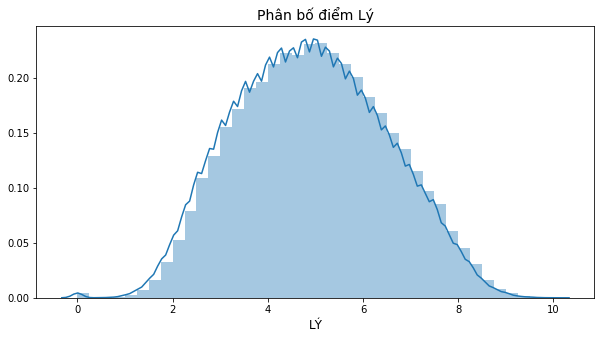

In [56]:
plt.figure(figsize=(10,5))
plt.xlabel('Điểm', fontsize=12)
plt.title("Phân bố điểm Lý", fontsize=14)
ax = sns.distplot(frame['LÝ'],hist=True,bins=40)
plt.show()

Cùng xem phân phối điểm các môn khác


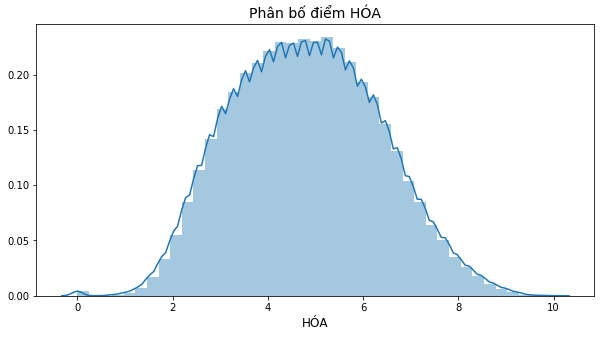

In [57]:
frame['HÓA'] = frame['HÓA'].fillna(axis=0, method='ffill')
plt.figure(figsize=(10,5))
plt.xlabel('Điểm', fontsize=12)
plt.title("Phân bố điểm HÓA", fontsize=14)
#ax = sns.kdeplot(frame['HÓA'])
ax = sns.distplot(frame['HÓA'],hist=True,bins=41)
plt.show()



Điểm các môn khá sát với phân phối Gauss. Một phân bố khá phổ biến trong đời sống. 

Tương tự ta cũng có phân phối điểm cho các môn khác

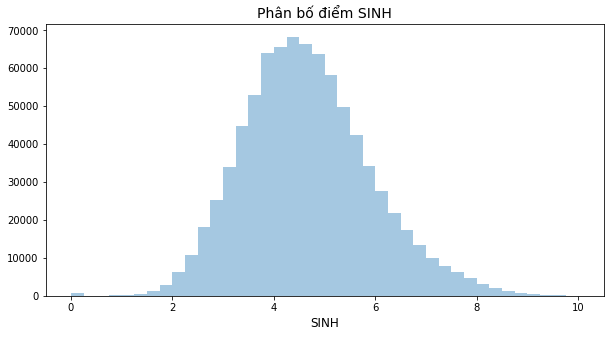

4.532906761959643

In [58]:
frame['SINH'] = frame['SINH'].fillna(axis=0, method='ffill')
plt.figure(figsize=(10,5))
plt.xlabel('Điểm', fontsize=12)
plt.title("Phân bố điểm SINH", fontsize=14)
ax =sns.distplot(frame['SINH'],bins=40,kde=False)## 40 giá trị
plt.show()
frame['SINH'].mean()

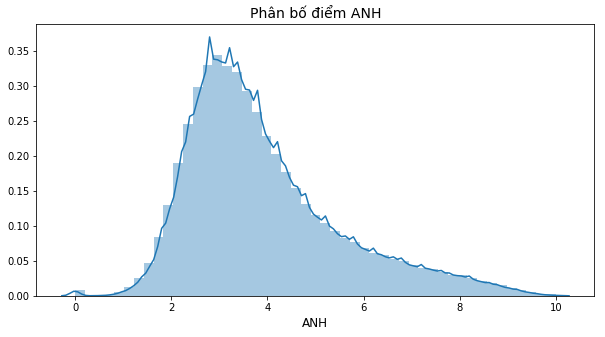

3.9292413408183196

In [59]:
frame['ANH'] = frame['ANH'].fillna(axis=0, method='ffill')
plt.figure(figsize=(10,5))
plt.xlabel('Điểm', fontsize=12)
plt.title("Phân bố điểm ANH", fontsize=14)
ax =sns.distplot(frame['ANH'],bins=49,hist=True)## 40 giá trị
plt.show()
frame['ANH'].mean()

Bây giờ cùng xem điểm của tỉnh Hà Giang

In [60]:
HG=pd.read_csv(path+"4.csv")

In [61]:
HG.head()

,SBD,TOÁN,VĂN,LÝ,HÓA,SINH,SỬ,ĐỊA,GDCD,ANH,KHTN,KHXH,KHỐI A,KHỐI B,KHỐI C,KHỐI D,KHỐI A1
0,5002915,1.4,2.00,NaN,NaN,NaN,2.25,5.25,4.25,3.4,NaN,3.92,NaN,NaN,9.50,6.80,NaN
1,5000921,5.6,4.75,6.50,3.75,3.50,2.75,6.75,7.75,2.4,4.58,5.75,15.85,12.85,14.25,12.75,14.50
2,5000863,3.8,3.50,2.75,2.75,2.75,2.50,3.75,5.25,4.0,2.75,3.83,9.30,9.30,9.75,11.30,10.55
3,5000867,2.4,2.75,2.00,3.50,3.25,4.25,5.00,6.75,3.0,2.92,5.33,7.90,9.15,12.00,8.15,7.40
4,5000909,9.4,3.25,9.00,3.25,3.00,NaN,NaN,NaN,9.6,5.08,NaN,21.65,15.65,NaN,22.25,28.00


In [62]:
for i in Môn_học: 
    print("Điểm trung mình môn",i,'là:',HG[i].mean())
    HG[i] = HG[i].fillna(axis=0, method='ffill')

Điểm trung mình môn ANH là: 2.967739702319143
Điểm trung mình môn GDCD là: 6.151831429696731
Điểm trung mình môn HÓA là: 4.1417089678511
Điểm trung mình môn LÝ là: 4.228956228956229
Điểm trung mình môn SINH là: 4.033771929824561
Điểm trung mình môn SỬ là: 3.4456839795171907
Điểm trung mình môn TOÁN là: 3.4943347361605697
Điểm trung mình môn VĂN là: 4.388423645320197
Điểm trung mình môn ĐỊA là: 4.734718598583675


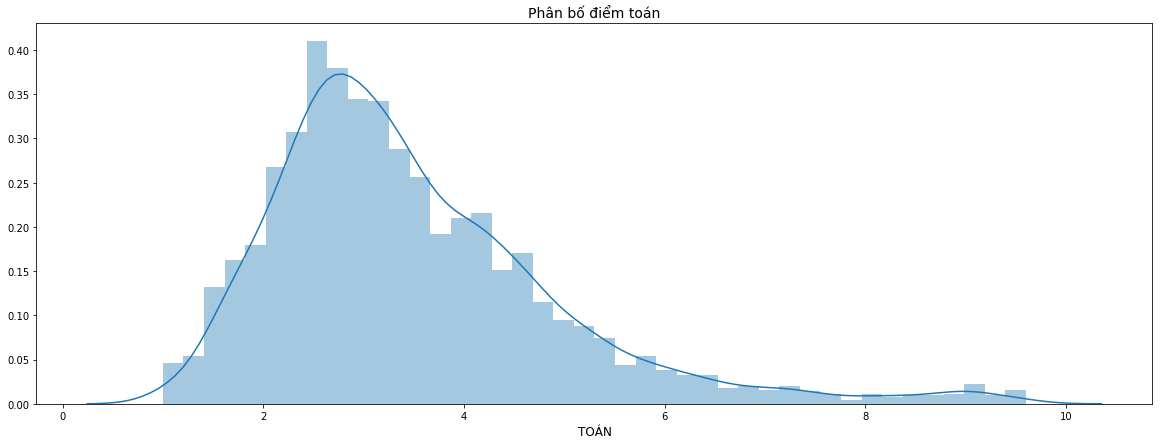

In [67]:
#frame['TOÁN'] = frame['TOÁN'].fillna(axis=0, method='ffill')
HG['TOÁN'] = HG['TOÁN'].fillna(axis=0, method='ffill')
plt.figure(figsize=(20,7))
plt.xlabel('Toán', fontsize=12)
plt.title("Phân bố điểm toán", fontsize=14)
ax = sns.distplot(HG['TOÁN'],hist=True,bins=42)
plt.show()


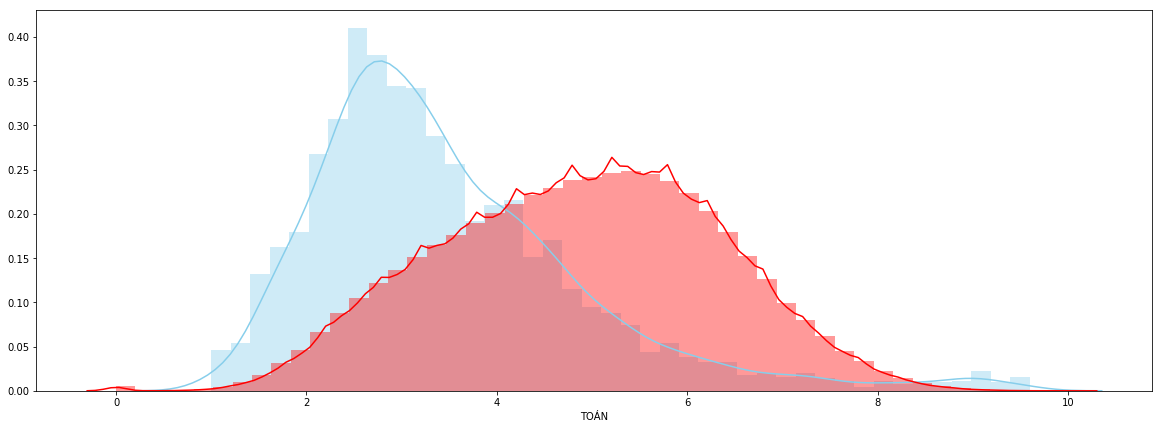

In [79]:
HG['TOÁN'] = HG['TOÁN'].fillna(axis=0, method='ffill')
frame['TOÁN'] = frame['TOÁN'].fillna(axis=0, method='ffill')
plt.figure(figsize=(20,7))
sns.distplot( HG['TOÁN'] , color="skyblue", label="Toan_Ha_Giang",bins=42)
sns.distplot( frame['TOÁN'] , color="red", label="Toan_ca_nuoc",bins=49)


Đồ thị màu đỏ là điểm thi toán cả nước, màu xanh là điểm thi của tỉnh Hà Giang. Từ đồ thị trên có thể thấy điểm Toán tỉnh Hà Giang khá thấp so với mặt bằng chung, nhưng lại có nhưng lại có tỉ lệ điểm được 9-10 cao vọt lên hẳn.

# so sánh điểm môn Anh

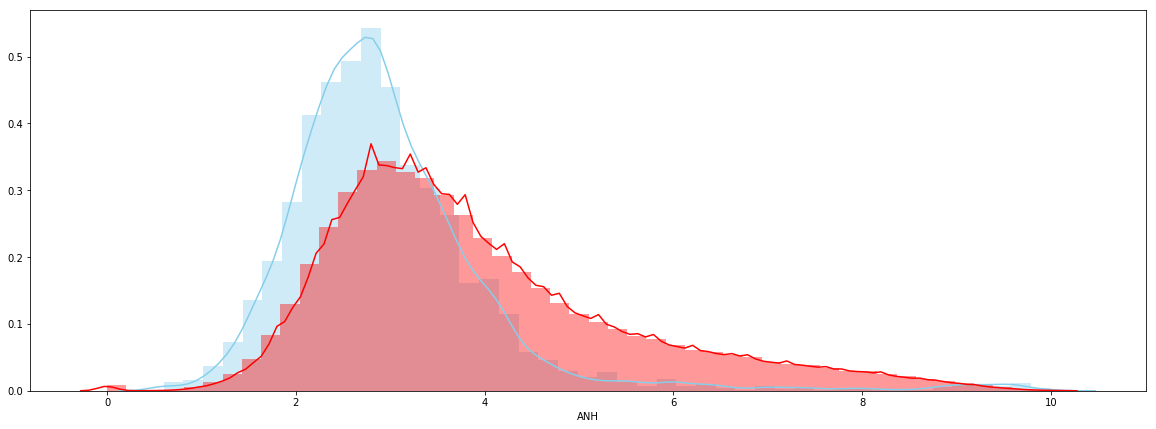

In [89]:
HG['ANH'] = HG['ANH'].fillna(axis=0, method='ffill')
frame['ANH'] = frame['ANH'].fillna(axis=0, method='ffill')
plt.figure(figsize=(20,7))
sns.distplot( HG['ANH'] , color="skyblue", label="ANH_Ha_Giang",bins=45)
sns.distplot( frame['ANH'] , color="red", label="ANH_ca_nuoc",bins=49)

Điểm 9-10 môn Anh ở Hà Giang không có nhô quá lớn so với mon toán, nhưng so với cả nước vẫn là khác biệt rất lớn
# điểm môn Hoá

/Users/pooh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/pooh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


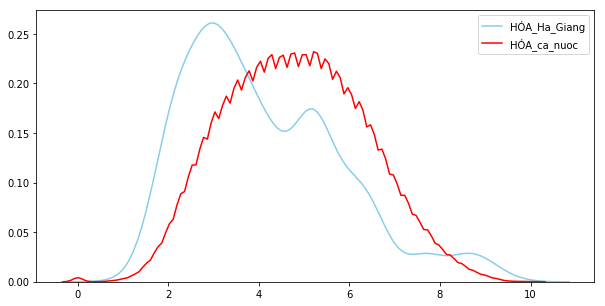

In [110]:
HG['HÓA'] = HG['HÓA'].fillna(axis=0, method='ffill')
frame['HÓA'] = frame['HÓA'].fillna(axis=0, method='ffill')
plt.figure(figsize=(10,5))
sns.kdeplot( HG['HÓA'] , color="skyblue", label="HÓA_Ha_Giang")
sns.kdeplot( frame['HÓA'] , color="red", label="HÓA_ca_nuoc")

# Điểm môn Văn

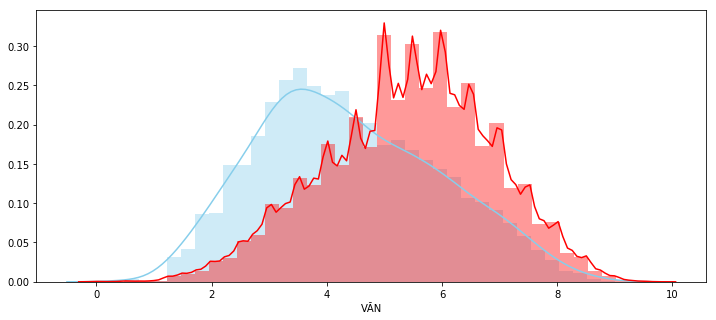

In [127]:
HG['VĂN'] = HG['VĂN'].fillna(axis=0, method='ffill')
frame['VĂN'] = frame['VĂN'].fillna(axis=0, method='ffill')
plt.figure(figsize=(12,5))
#sns.kdeplot( HG['VĂN'] , color="skyblue", label="HÓA_Ha_Giang")
#sns.kdeplot( frame['VĂN'] , color="red", label="HÓA_ca_nuoc")
sns.distplot( HG['VĂN'] , color="skyblue", label="ANH_Ha_Giang",bins=35)
sns.distplot( frame['VĂN'] , color="red", label="ANH_ca_nuoc",bins=40)

Với môn tự luận, dường như không còn có hiện tượng phồng lên ở khu vực điểm 9-10. 

/Users/pooh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/pooh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


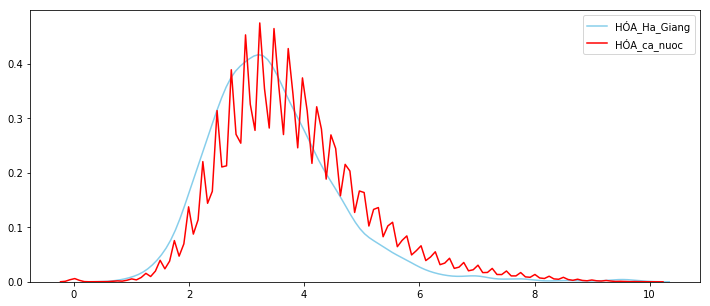

In [129]:
HG['SỬ'] = HG['SỬ'].fillna(axis=0, method='ffill')
frame['SỬ'] = frame['SỬ'].fillna(axis=0, method='ffill')
plt.figure(figsize=(12,5))
sns.kdeplot( HG['SỬ'] , color="skyblue", label="Sử_Ha_Giang")
sns.kdeplot( frame['SỬ'] , color="red", label="Sử_ca_nuoc")
#sns.distplot( HG['VĂN'] , color="skyblue", label="ANH_Ha_Giang",bins=35)
#sns.distplot( frame['VĂN'] , color="red", label="ANH_ca_nuoc",bins=40)

Kết luận: Từ các biểu đồ trên chúng ta có thể cái nhìn rõ nét về những nghi vấn điểm ở tỉnh Hà Giang, bây giờ cùng chuyển sang các tỉnh thành khác.

# Tỉnh Lao Cai

In [134]:
LC=pd.read_csv(path+"8.csv")
for i in Môn_học: 
    print("Điểm trung mình môn",i,'là:',LC[i].mean())
    LC[i] =LC[i].fillna(axis=0, method='ffill')

Điểm trung mình môn ANH là: 3.3552433715868593
Điểm trung mình môn GDCD là: 7.398080782739589
Điểm trung mình môn HÓA là: 5.039614561027837
Điểm trung mình môn LÝ là: 4.999096820809249
Điểm trung mình môn SINH là: 4.945029027576197
Điểm trung mình môn SỬ là: 3.949719509661334
Điểm trung mình môn TOÁN là: 4.505252949733298
Điểm trung mình môn VĂN là: 5.688672320991682
Điểm trung mình môn ĐỊA là: 5.66381015161503


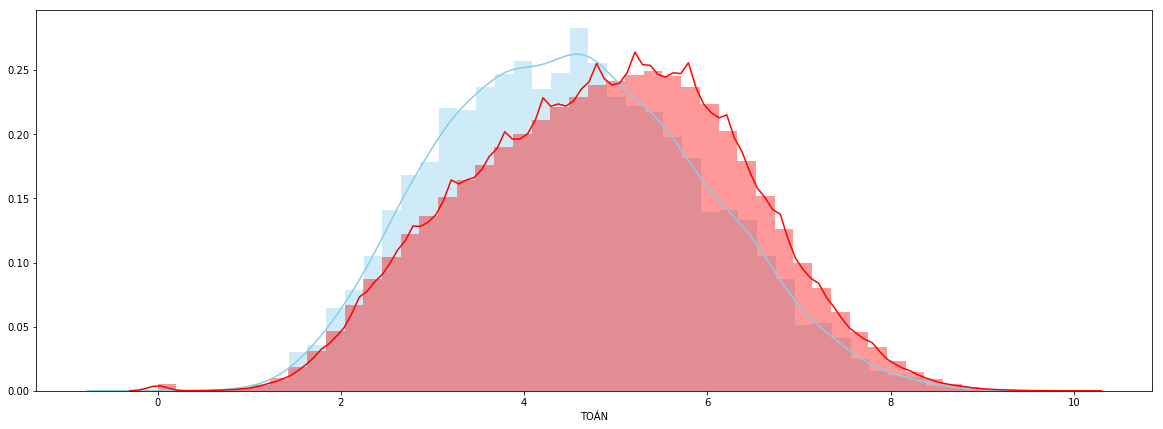

In [139]:
LC['TOÁN'] = LC['TOÁN'].fillna(axis=0, method='ffill')
frame['TOÁN'] = frame['TOÁN'].fillna(axis=0, method='ffill')
plt.figure(figsize=(20,7))
sns.distplot( LC['TOÁN'] , color="skyblue", label="Toan_Lao_Cai",bins=45)
sns.distplot( frame['TOÁN'] , color="red", label="Toan_ca_nuoc",bins=49)

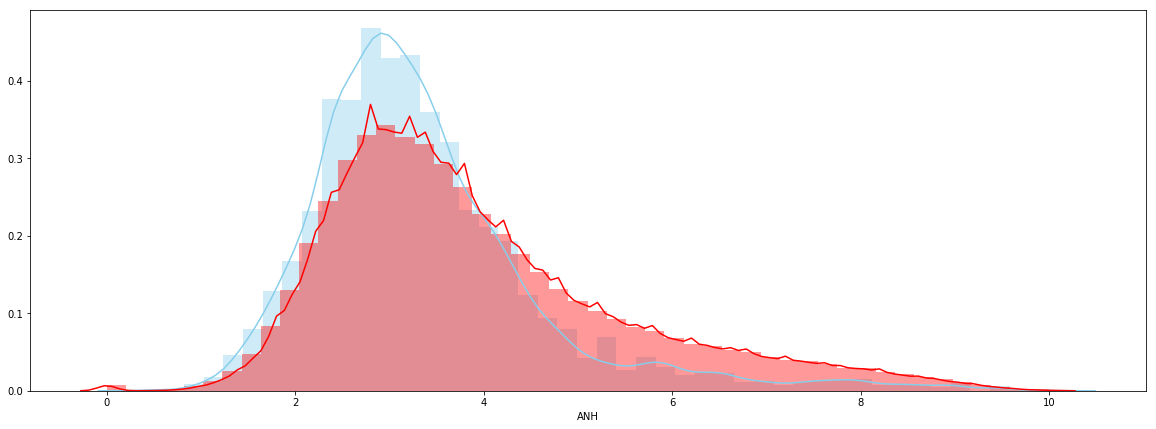

In [141]:
LC['ANH'] = LC['ANH'].fillna(axis=0, method='ffill')
frame['ANH'] = frame['ANH'].fillna(axis=0, method='ffill')
plt.figure(figsize=(20,7))
sns.distplot( LC['ANH'] , color="skyblue", label="ANH_Lao_Cai",bins=46)
sns.distplot( frame['ANH'] , color="red", label="ANH_ca_nuoc",bins=49)

/Users/pooh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/pooh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


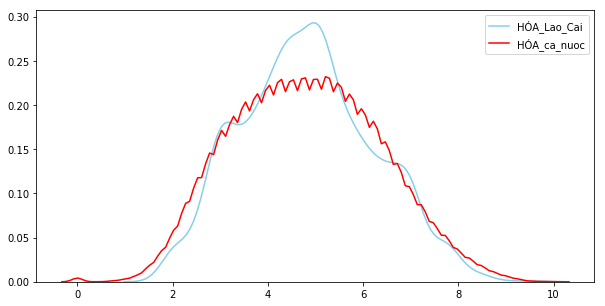

In [142]:
LC['HÓA'] = LC['HÓA'].fillna(axis=0, method='ffill')
frame['HÓA'] = frame['HÓA'].fillna(axis=0, method='ffill')
plt.figure(figsize=(10,5))
sns.kdeplot( LC['HÓA'] , color="skyblue", label="HÓA_Lao_Cai")
sns.kdeplot( frame['HÓA'] , color="red", label="HÓA_ca_nuoc")

/Users/pooh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/pooh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


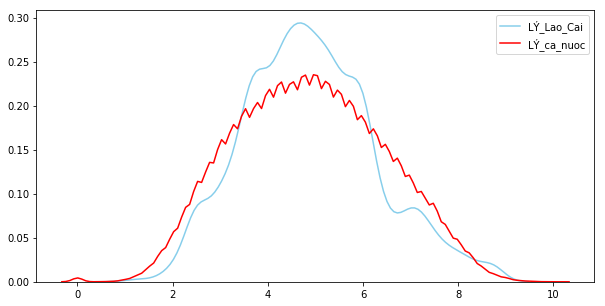

In [143]:
LC['LÝ'] = LC['LÝ'].fillna(axis=0, method='ffill')
frame['LÝ'] = frame['LÝ'].fillna(axis=0, method='ffill')
plt.figure(figsize=(10,5))
sns.kdeplot( LC['LÝ'] , color="skyblue", label="LÝ_Lao_Cai")
sns.kdeplot( frame['LÝ'] , color="red", label="LÝ_ca_nuoc")

CÙng một phương pháp so sánh trên, với các môn trắc nghiệm, chúng ta không thấy điểm ở Lào Cai có những dấu hiệu bất thường. Cùng xem lại để so sánh các môn trắc nghiệm ở Lào Cai

/Users/pooh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/pooh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


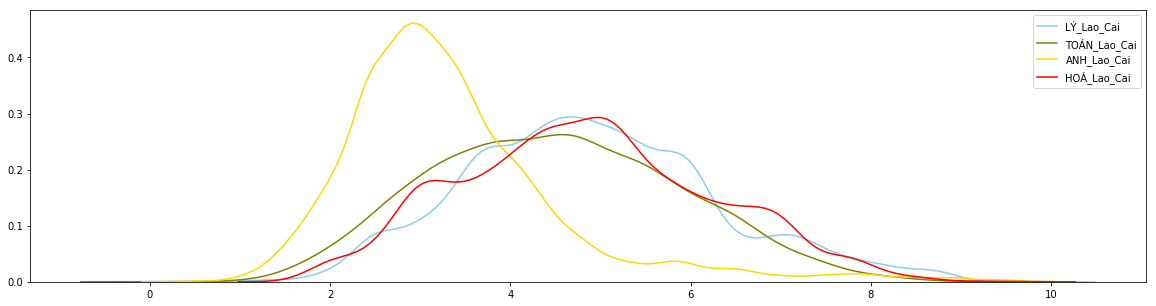

In [145]:
plt.figure(figsize=(20,5))
sns.kdeplot( LC['LÝ'] , color="skyblue", label="LÝ_Lao_Cai")
sns.kdeplot( LC['TOÁN'] , color="olive", label="TOÁN_Lao_Cai")
sns.kdeplot( LC['ANH'] , color="gold", label="ANH_Lao_Cai")
sns.kdeplot( LC['HÓA'] , color="red", label="HOÁ_Lao_Cai")